In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
def one_hot_encode_columns(df:pd.DataFrame,columns:list)->pd.DataFrame:
  """This function takes in a list and Pandas Dataframe
    and transforms the coulmns into binary columns

  Args:
      Pandas Dataframe
      List
  """
  
  for col in columns:
    df = pd.concat([df.drop(col, axis =1), pd.get_dummies(df[col]).add_prefix(col+"_") ], axis=1)
  
  return df

In [3]:
df = pd.read_csv("income.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df = one_hot_encode_columns(df,["occupation","workclass","marital-status","relationship","race","native-country"])

In [7]:
df.drop("education",axis=1, inplace=True)

In [8]:
df["gender"] = df["gender"].apply(lambda x: 1 if x == "Male" else 0)
df["income"] = df["income"].apply(lambda x: 1 if x == ">50K" else 0)

<Axes: >

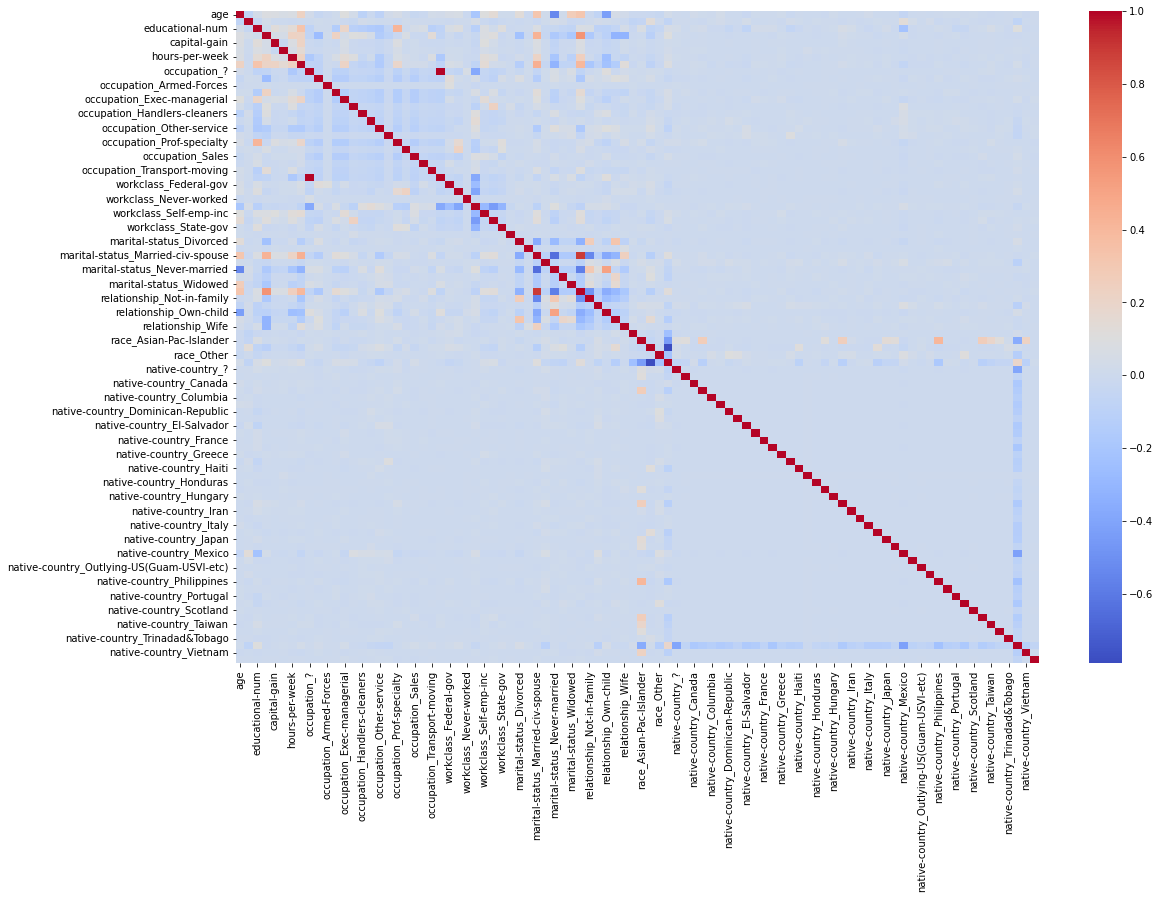

In [9]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")

In [10]:
correlations = df.corr()["income"].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis =1)

<Axes: >

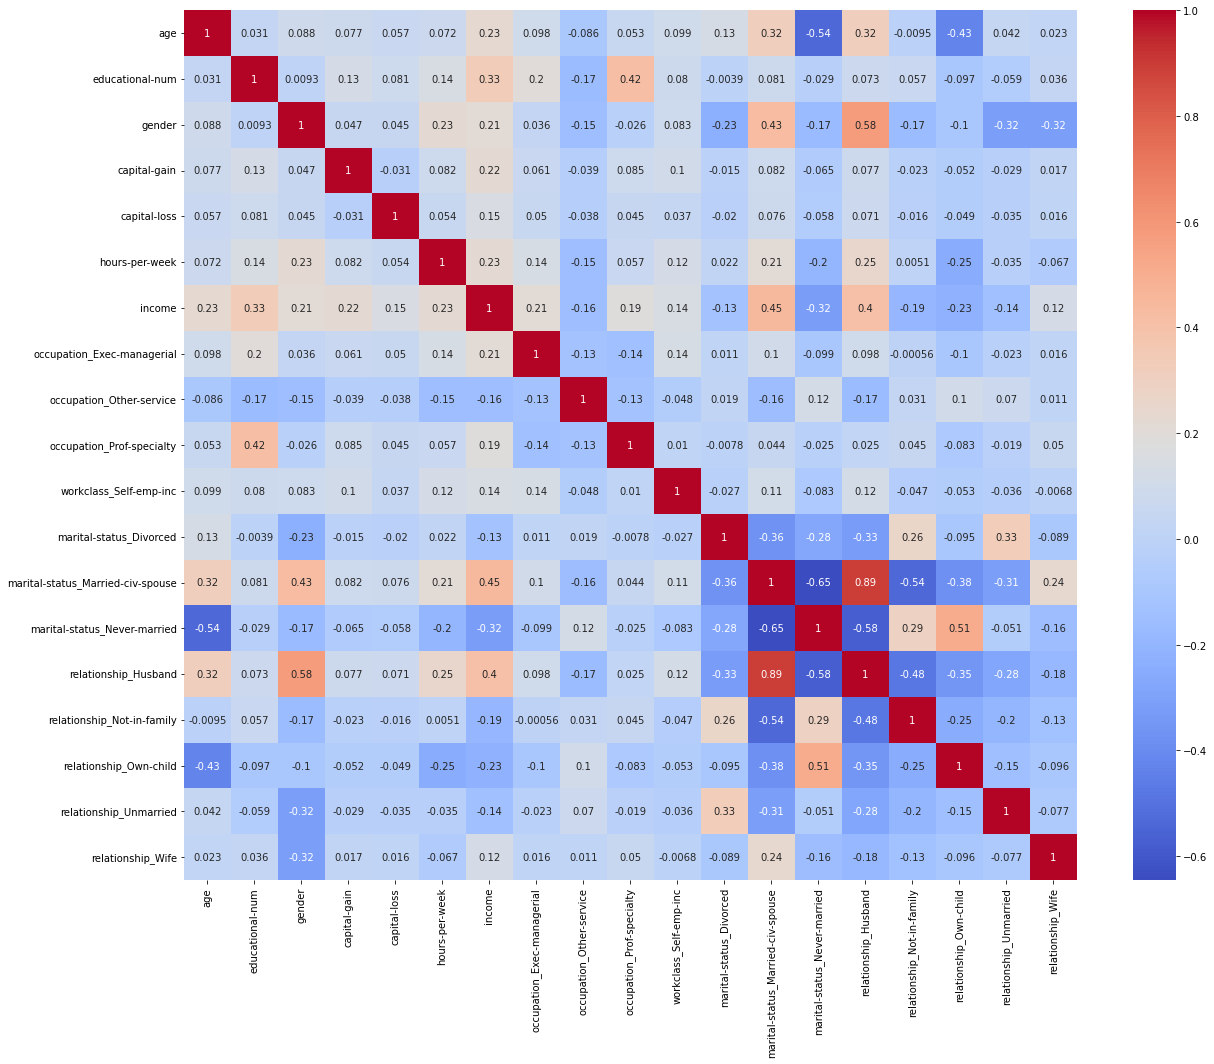

In [14]:
plt.figure(figsize=(20,16))
sns.heatmap(df_dropped.corr(), annot=True, cmap="coolwarm")

In [16]:
train_df, test_df = train_test_split(df,test_size=0.2)

In [17]:
train_X, train_y = train_df.drop("income", axis=1), train_df["income"]
test_X, test_y = test_df.drop("income", axis=1), test_df["income"]

In [18]:
forest = RandomForestClassifier()
forest.fit(train_X, train_y)

RandomForestClassifier()

In [19]:
forest.score(test_X, test_y)

0.8578155389497389

In [20]:
feature_results = dict(zip(forest.feature_names_in_, forest.feature_importances_))

In [29]:
sorted_feature_results = {k:v for k,v in sorted(feature_results.items(), key = lambda item: item[1], reverse=True)}

In [30]:
sorted_feature_results

{'fnlwgt': 0.17339170253151195,
 'age': 0.14809967291382142,
 'educational-num': 0.10951849868847569,
 'capital-gain': 0.09485965255253045,
 'hours-per-week': 0.08360377674976975,
 'marital-status_Married-civ-spouse': 0.06819027898539391,
 'relationship_Husband': 0.03905868964129051,
 'marital-status_Never-married': 0.03308610190305892,
 'capital-loss': 0.03105372803301119,
 'occupation_Exec-managerial': 0.019881019513138042,
 'occupation_Prof-specialty': 0.017702586852003134,
 'relationship_Not-in-family': 0.011335458717290785,
 'gender': 0.01114765067536107,
 'relationship_Wife': 0.009103107556068411,
 'workclass_Private': 0.008785529707715033,
 'relationship_Own-child': 0.007838819540931956,
 'workclass_Self-emp-not-inc': 0.007607314564544432,
 'occupation_Other-service': 0.007119172324914332,
 'marital-status_Divorced': 0.006588413990408112,
 'occupation_Sales': 0.005825083027472213,
 'race_White': 0.005724037367079121,
 'native-country_United-States': 0.005702760782427508,
 'occup